In [1]:
#导入常用的库
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    # 用来正常显示负号
pd.options.display.max_columns = None #显示完整打印数据
pd.options.display.max_rows = None
plt.rcParams['figure.dpi'] = 150 # 修改图片分辨率
import numpy as np
import warnings
warnings.filterwarnings("ignore") # 忽略警告

In [2]:
# 读取数据
data = pd.read_csv('parkinsons.data')
data.head() # 打印数据前五行

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## 1 数据探索与可视化分析

In [3]:
# 查看数据形状
data.shape

(195, 24)

In [4]:
# 查看数据类型分布
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [5]:
# 数据描述
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
# 检查数据每列缺失值个数，发现不存在缺失值
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Text(0.5, 1.0, '可视化数据缺失情况')

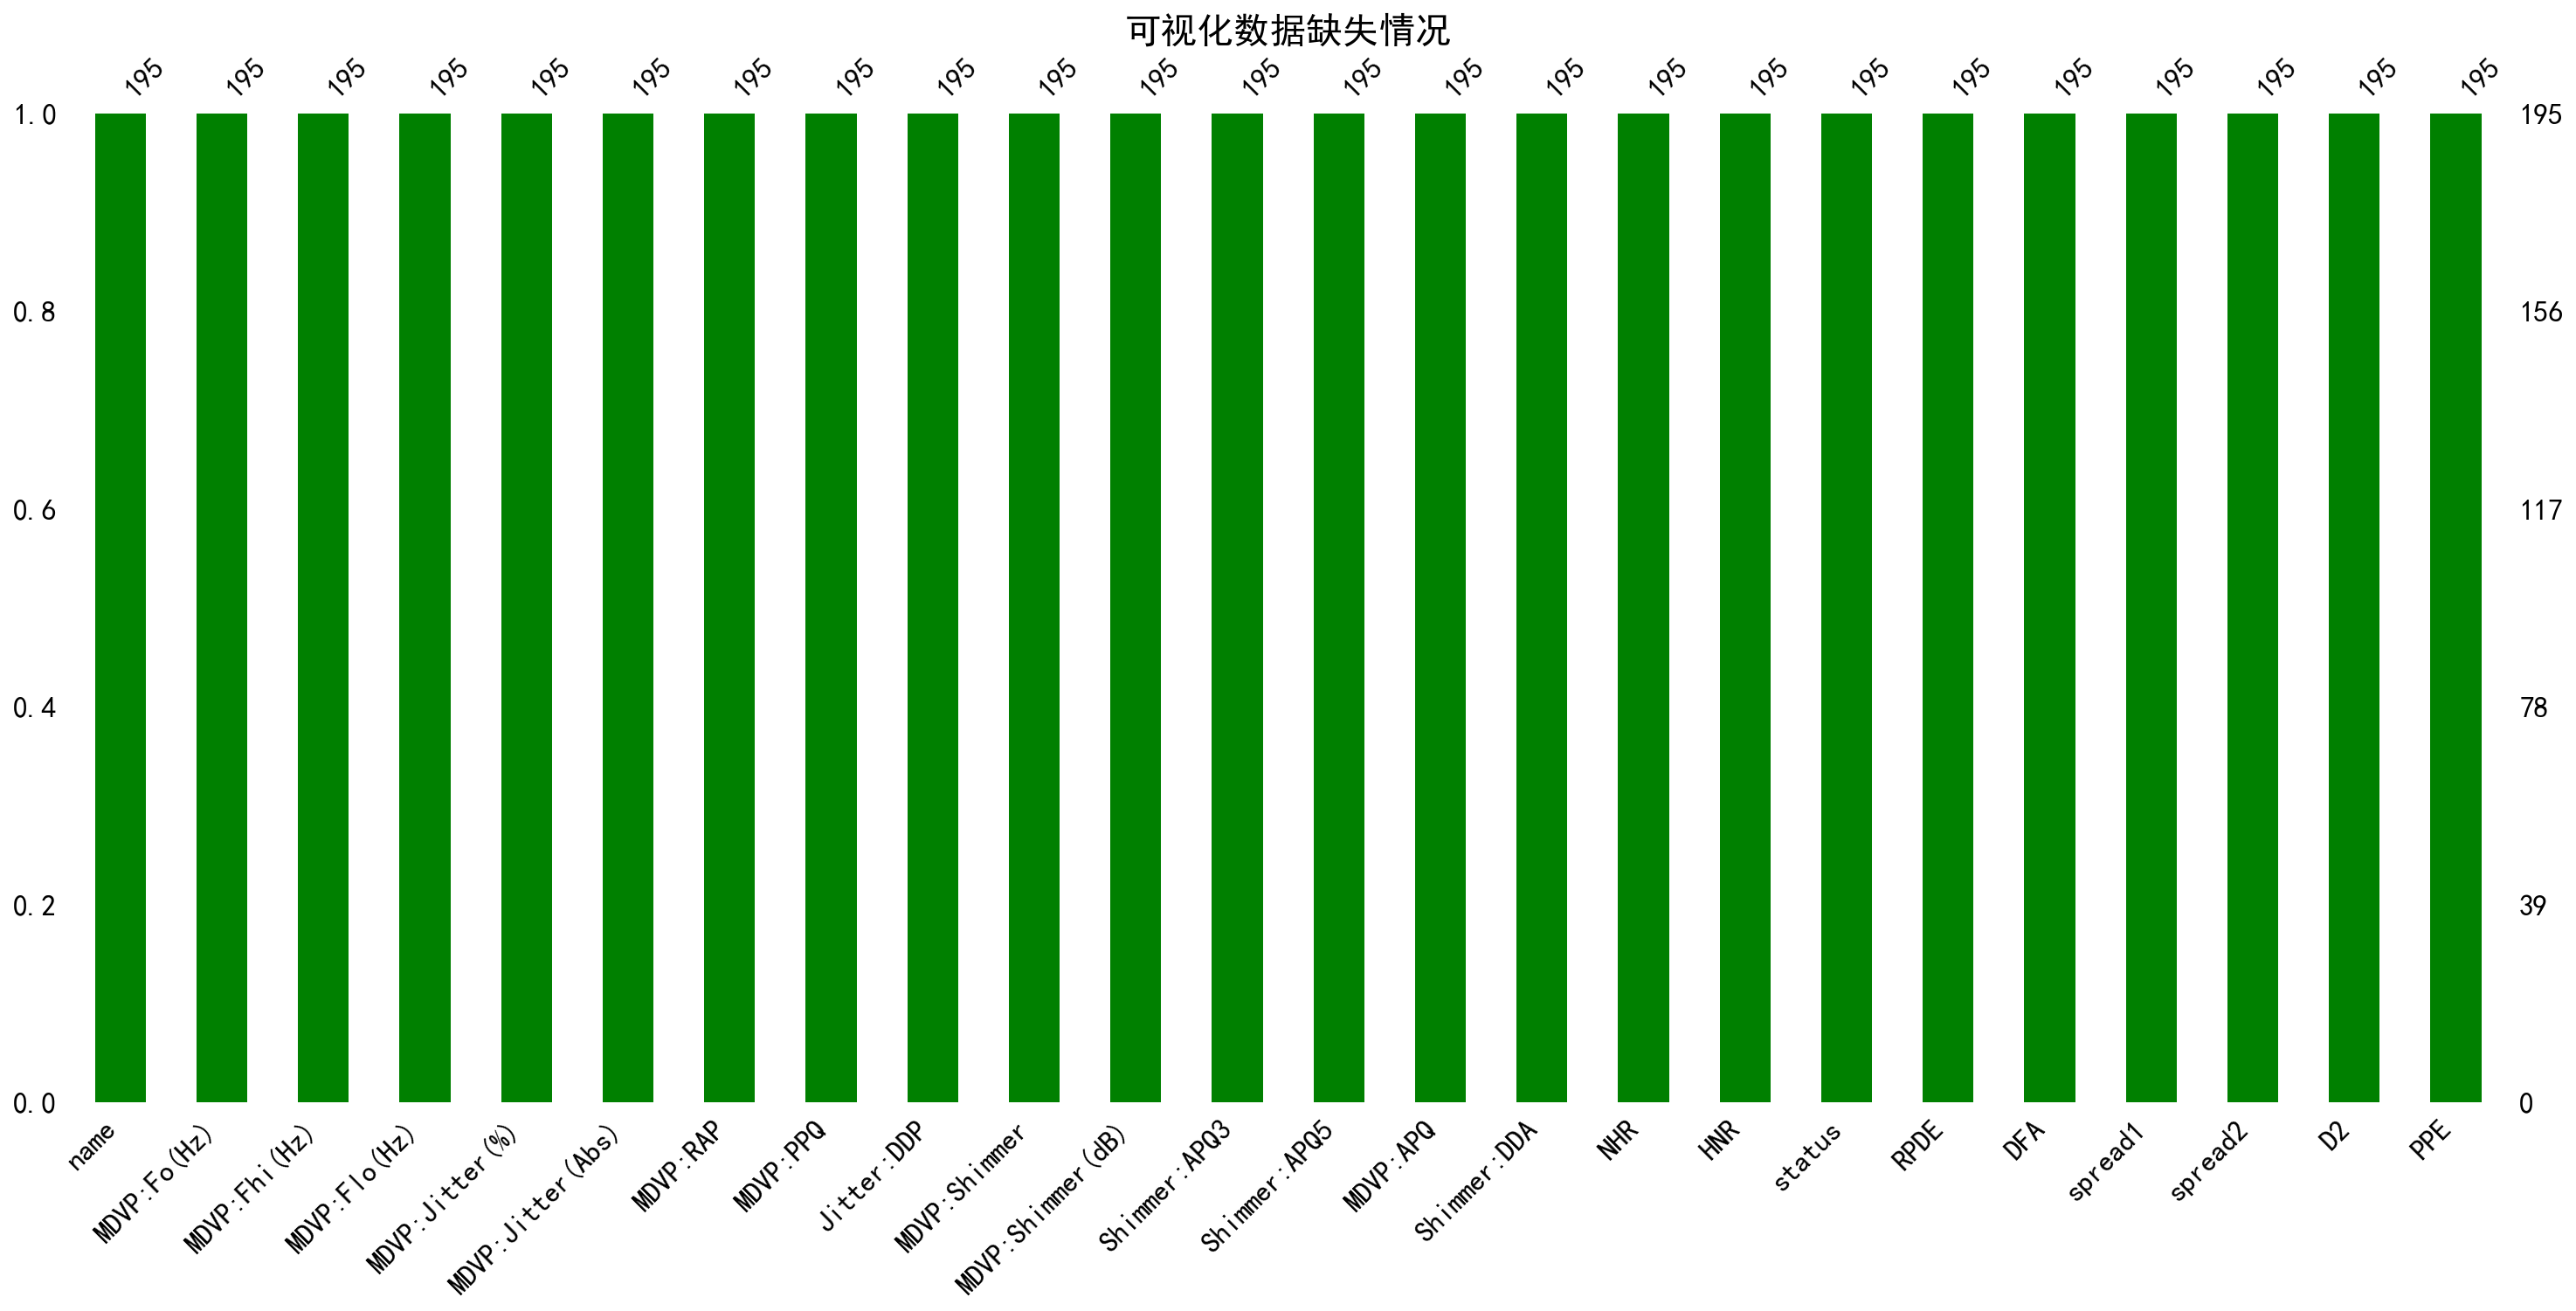

In [7]:
# 可视化数据缺失情况
import missingno as msno
plt.figure()
p=msno.bar(data,color='g')
plt.title('可视化数据缺失情况',fontsize=20)

1    147
0     48
Name: status, dtype: int64


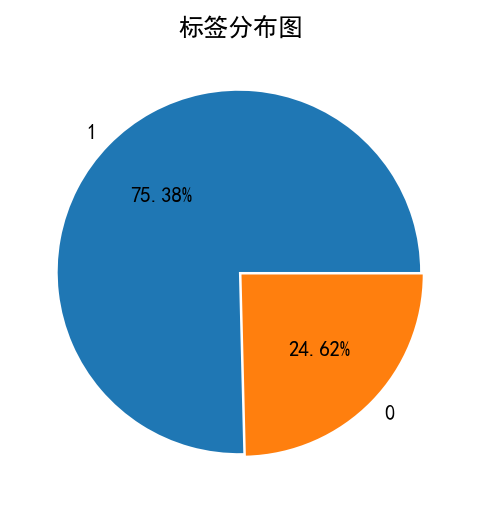

In [8]:
# 统计标签分布情况,发现数据比较平衡
print(data['status'].value_counts())
plt.pie(data['status'].value_counts(),labels=data['status'].value_counts().index,autopct='%1.2f%%',explode=(0.02,0))
plt.title('标签分布图')
plt.show()

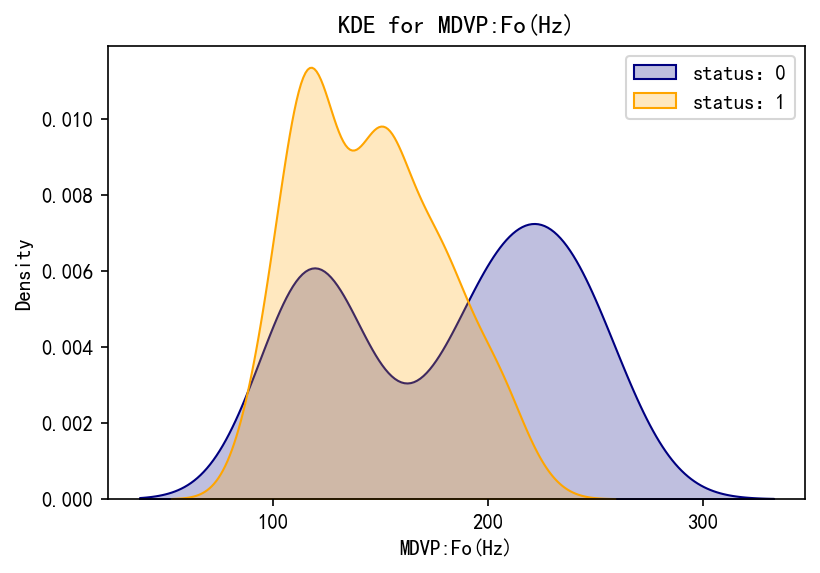

In [9]:
# 核密度图，MDVP:Fo(Hz)
def kdeplot(feature,xlabel):
    plt.title("KDE for {0}".format(feature))
    ax0 = sns.kdeplot(data[data['status'] == 0][feature].dropna(), color= 'navy', label= 'status：0', shade='True')
    ax1 = sns.kdeplot(data[data['status'] == 1][feature].dropna(), color= 'orange', label= 'status：1',shade='True')
    plt.xlabel(xlabel)
    #设置字体大小
    plt.rcParams.update({'font.size': 16})
    plt.legend(fontsize=10)
kdeplot('MDVP:Fo(Hz)','MDVP:Fo(Hz)')
plt.show()

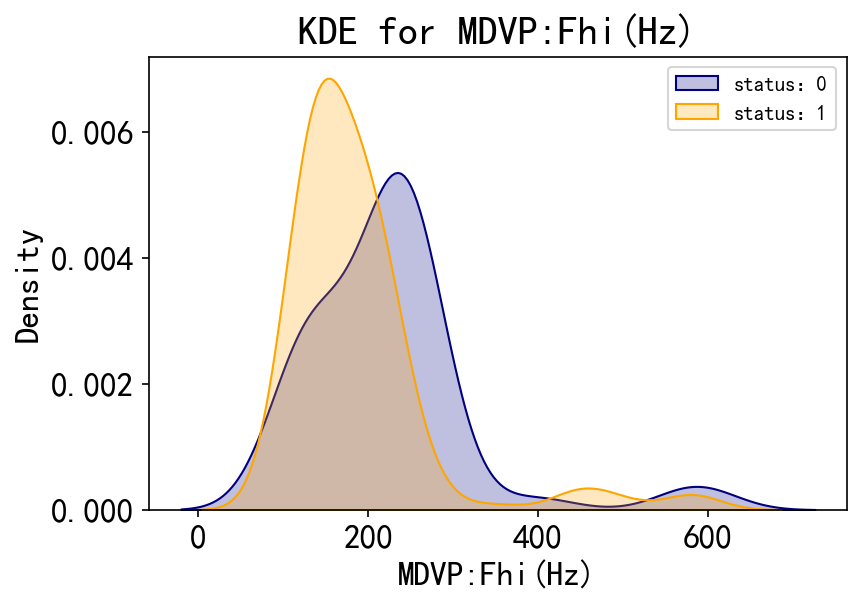

In [10]:
# 核密度图，MDVP:Fhi(Hz)
def kdeplot(feature,xlabel):
    plt.title("KDE for {0}".format(feature))
    ax0 = sns.kdeplot(data[data['status'] == 0][feature].dropna(), color= 'navy', label= 'status：0', shade='True')
    ax1 = sns.kdeplot(data[data['status'] == 1][feature].dropna(), color= 'orange', label= 'status：1',shade='True')
    plt.xlabel(xlabel)
    #设置字体大小
    plt.rcParams.update({'font.size': 16})
    plt.legend(fontsize=10)
kdeplot('MDVP:Fhi(Hz)','MDVP:Fhi(Hz)')
plt.show()

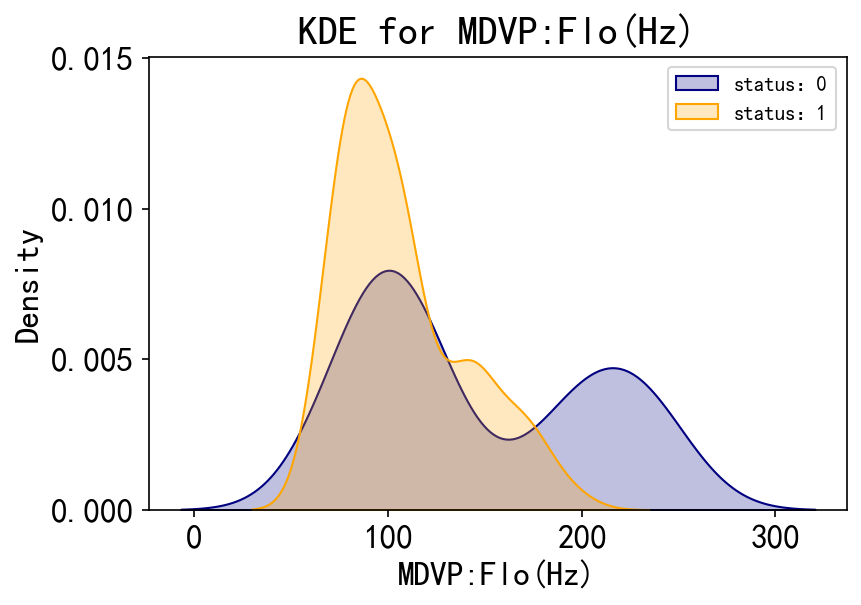

In [11]:
# 核密度图，MDVP:Flo(Hz)
def kdeplot(feature,xlabel):
    plt.title("KDE for {0}".format(feature))
    ax0 = sns.kdeplot(data[data['status'] == 0][feature].dropna(), color= 'navy', label= 'status：0', shade='True')
    ax1 = sns.kdeplot(data[data['status'] == 1][feature].dropna(), color= 'orange', label= 'status：1',shade='True')
    plt.xlabel(xlabel)
    #设置字体大小
    plt.rcParams.update({'font.size': 16})
    plt.legend(fontsize=10)
kdeplot('MDVP:Flo(Hz)','MDVP:Flo(Hz)')
plt.show()

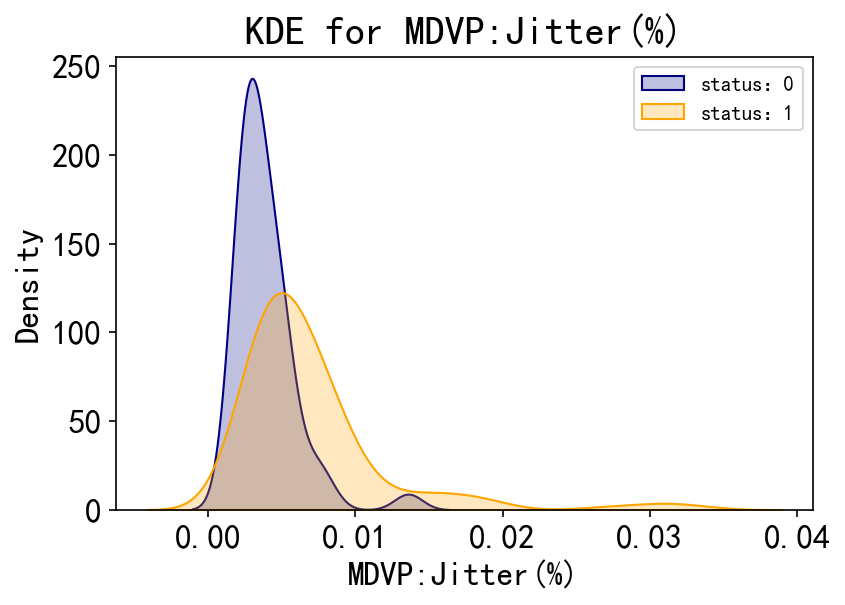

In [12]:
# 核密度图，MDVP:Jitter(%)
def kdeplot(feature,xlabel):
    plt.title("KDE for {0}".format(feature))
    ax0 = sns.kdeplot(data[data['status'] == 0][feature].dropna(), color= 'navy', label= 'status：0', shade='True')
    ax1 = sns.kdeplot(data[data['status'] == 1][feature].dropna(), color= 'orange', label= 'status：1',shade='True')
    plt.xlabel(xlabel)
    #设置字体大小
    plt.rcParams.update({'font.size': 16})
    plt.legend(fontsize=10)
kdeplot('MDVP:Jitter(%)','MDVP:Jitter(%)')
plt.show()

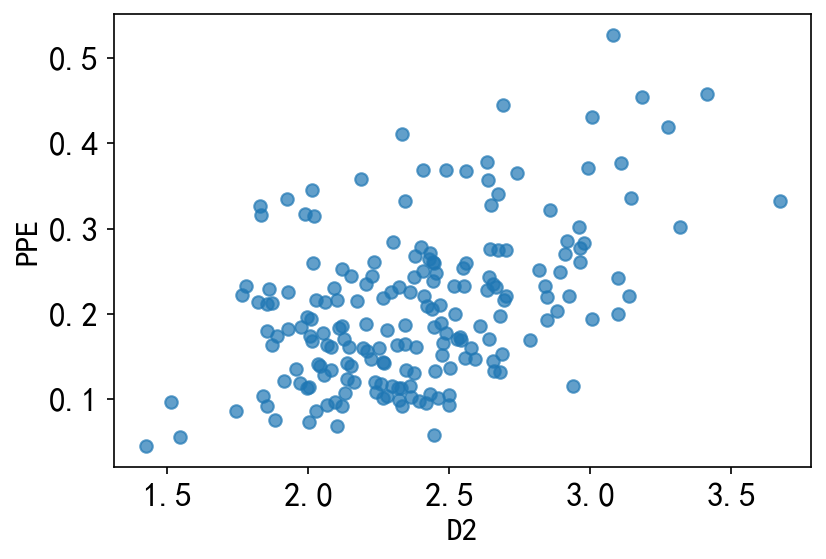

In [13]:
# 绘制D2和PPE散点图
plt.figure()
plt.scatter(x=data['D2'], y=data['PPE'],alpha=0.7)
plt.xlabel('D2', fontsize=15)
plt.ylabel('PPE', fontsize=15)
plt.show()

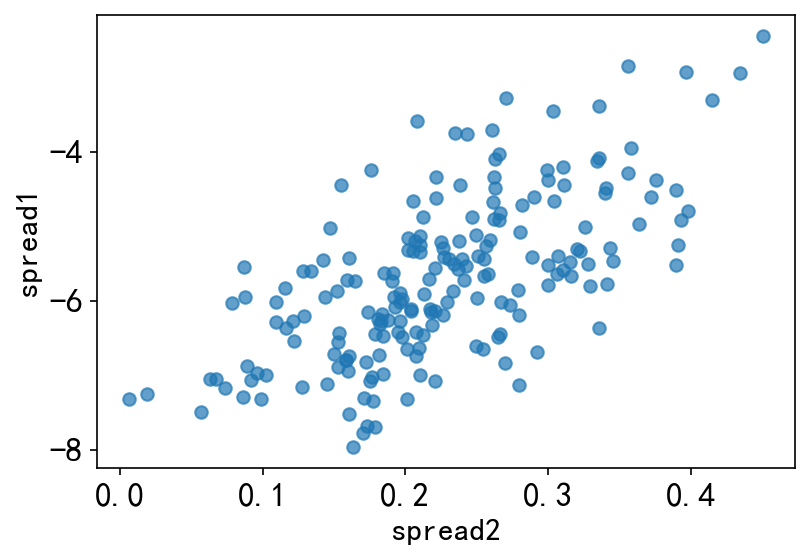

In [14]:
# 绘制spread2和spread1散点图
plt.figure()
plt.scatter(x=data['spread2'], y=data['spread1'],alpha=0.7)
plt.xlabel('spread2', fontsize=15)
plt.ylabel('spread1', fontsize=15)
plt.show()

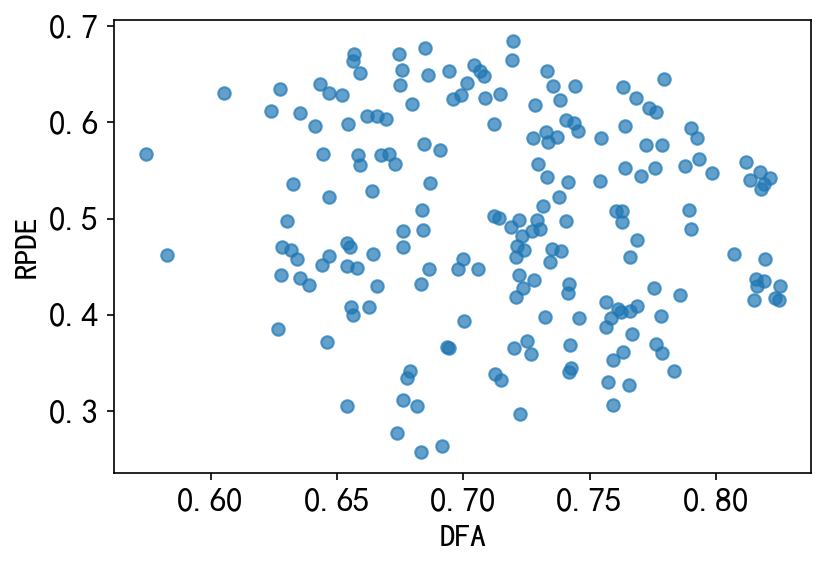

In [15]:
# 绘制DFA和RPDE散点图
plt.figure()
plt.scatter(x=data['DFA'], y=data['RPDE'],alpha=0.7)
plt.xlabel('DFA', fontsize=15)
plt.ylabel('RPDE', fontsize=15)
plt.show()

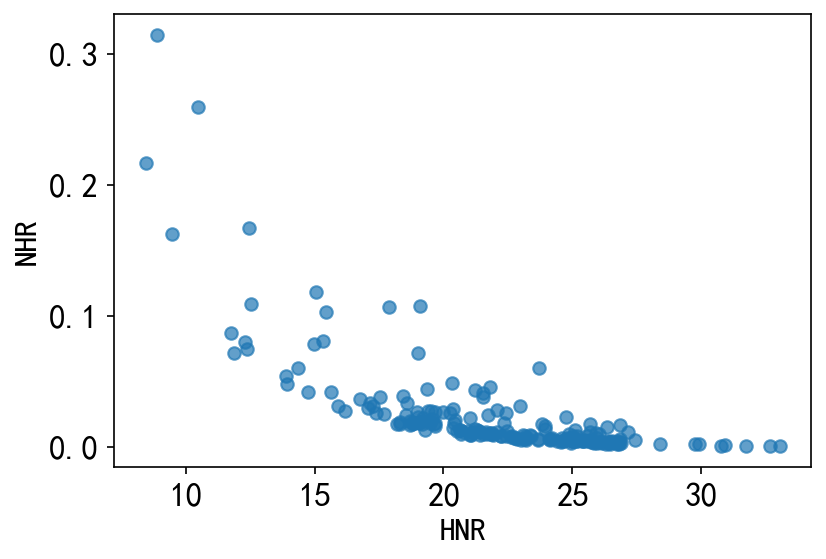

In [16]:
# 绘制HNR和NHR散点图
plt.figure()
plt.scatter(x=data['HNR'], y=data['NHR'],alpha=0.7)
plt.xlabel('HNR', fontsize=15)
plt.ylabel('NHR', fontsize=15)
plt.show()

## 2 数据预处理

In [17]:
# 删除建模无关列
data = data.drop('name',axis=1)
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Text(0.5, 1.0, '相关系数热力图')

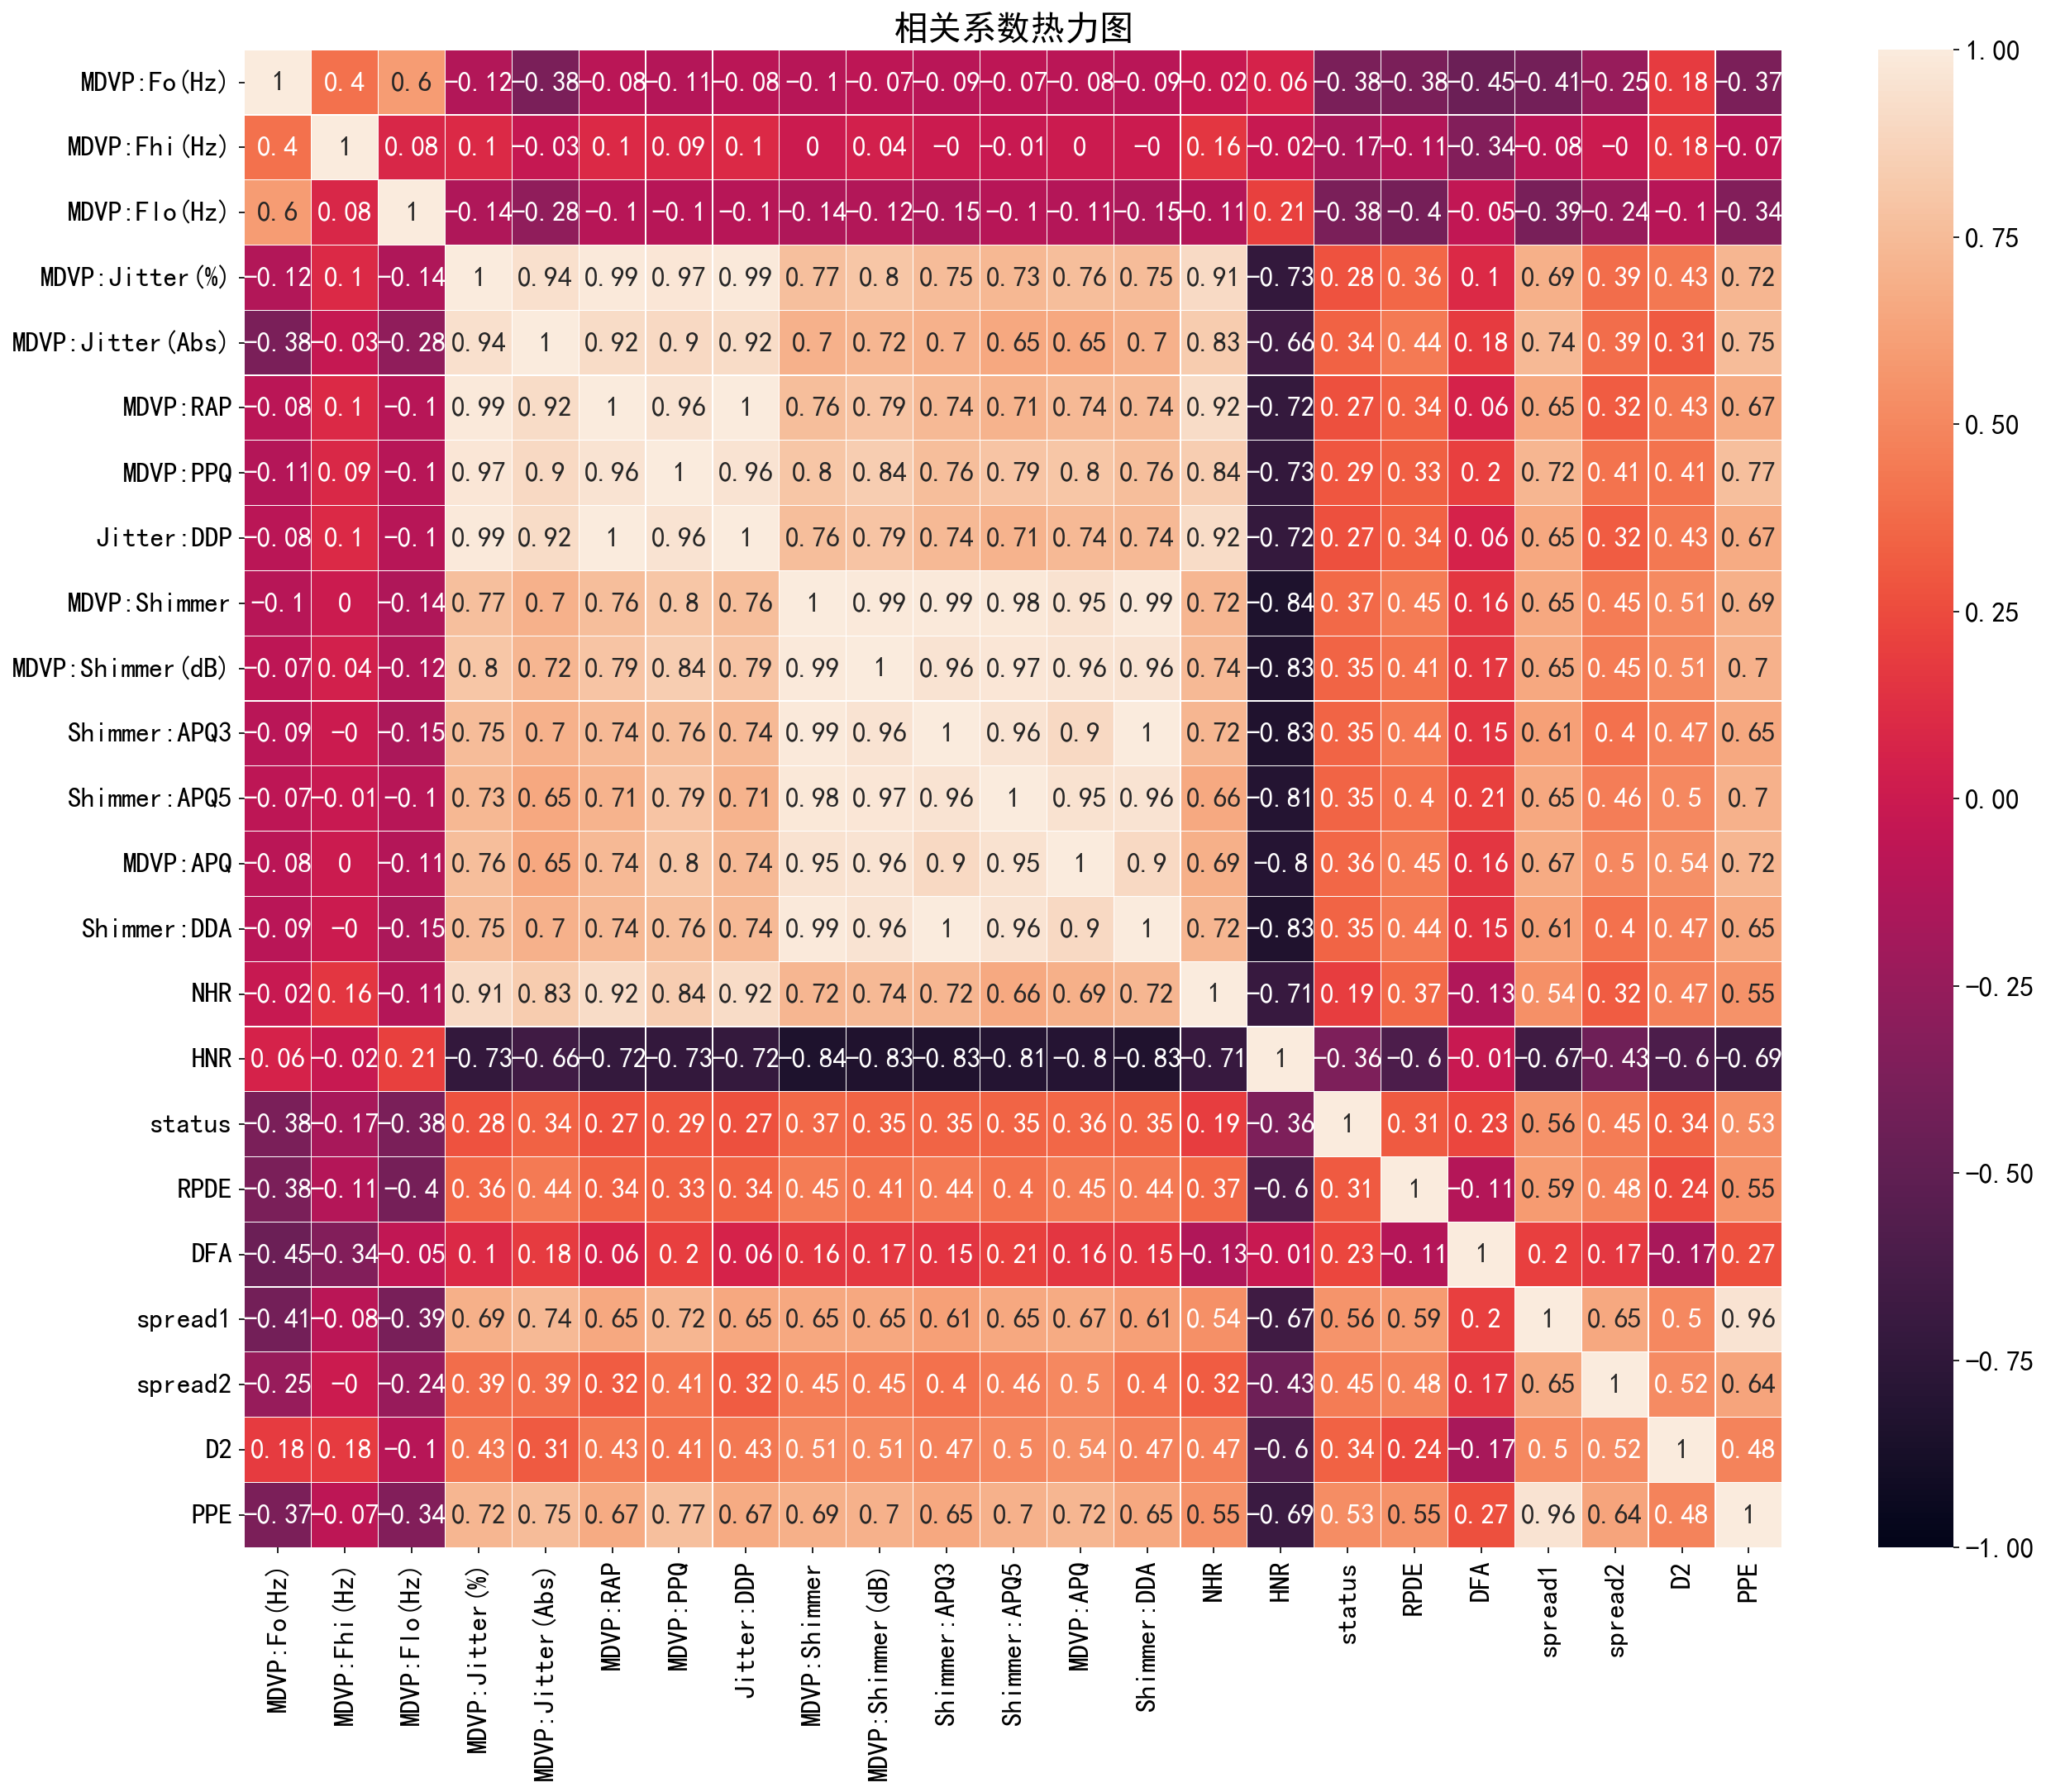

In [18]:
# 画热力图，数值为两个变量之间的相关系数,从图中可以看出每个变量之间的相关性（正相关还是负相关），以及相关性大小。
plt.figure(figsize=(20,16))
import seaborn as sns
cov = data.corr().round(2)
sns.heatmap(cov,annot=True,linewidths=0.1,vmin=-1,)
plt.title('相关系数热力图',size=20)

In [19]:
# 分离特征和标签
x = data.drop(['status'],axis=1)
y = data['status']

In [20]:
# 数据分割
# 7比3划分训练集，测试集，设置随机种子random_state=2022，保证实验能够复现
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=2022)

In [21]:
# 特征选择
# 基于xgboost算法的特征重要性评分
import xgboost as xgb
model_XGB=xgb.XGBClassifier(verbosity=0,
                            max_depth=6,
                            learning_rate=0.3,
                            n_estimators=100,
                            random_state=2022)
model_XGB.fit(x_train,y_train)
data_after1 = pd.DataFrame(model_XGB.feature_importances_, 
                          columns=['importance'])
data_after2 = pd.DataFrame(model_XGB.feature_importances_,
                          index=x_train.columns, columns=['特征重要性'])
data_after2 = data_after2.sort_values(by='特征重要性',ascending=False)

In [22]:
# 对基于xgboost算法的特征重要性评分的特征进行排序，升序为了画图，后面有降序的
aa = pd.DataFrame(x_train.columns,columns=['feature'])
feature = pd.concat([aa,data_after1],axis=1)
features_import = feature.sort_values(by='importance',ascending=True)
features_import

,feature,importance
13,Shimmer:DDA,0.000000
12,MDVP:APQ,0.000000
11,Shimmer:APQ5,0.000000
6,MDVP:PPQ,0.000000
9,MDVP:Shimmer(dB),0.000000
3,MDVP:Jitter(%),0.003170
10,Shimmer:APQ3,0.003522
20,D2,0.008323
4,MDVP:Jitter(Abs),0.011662
17,DFA,0.015350


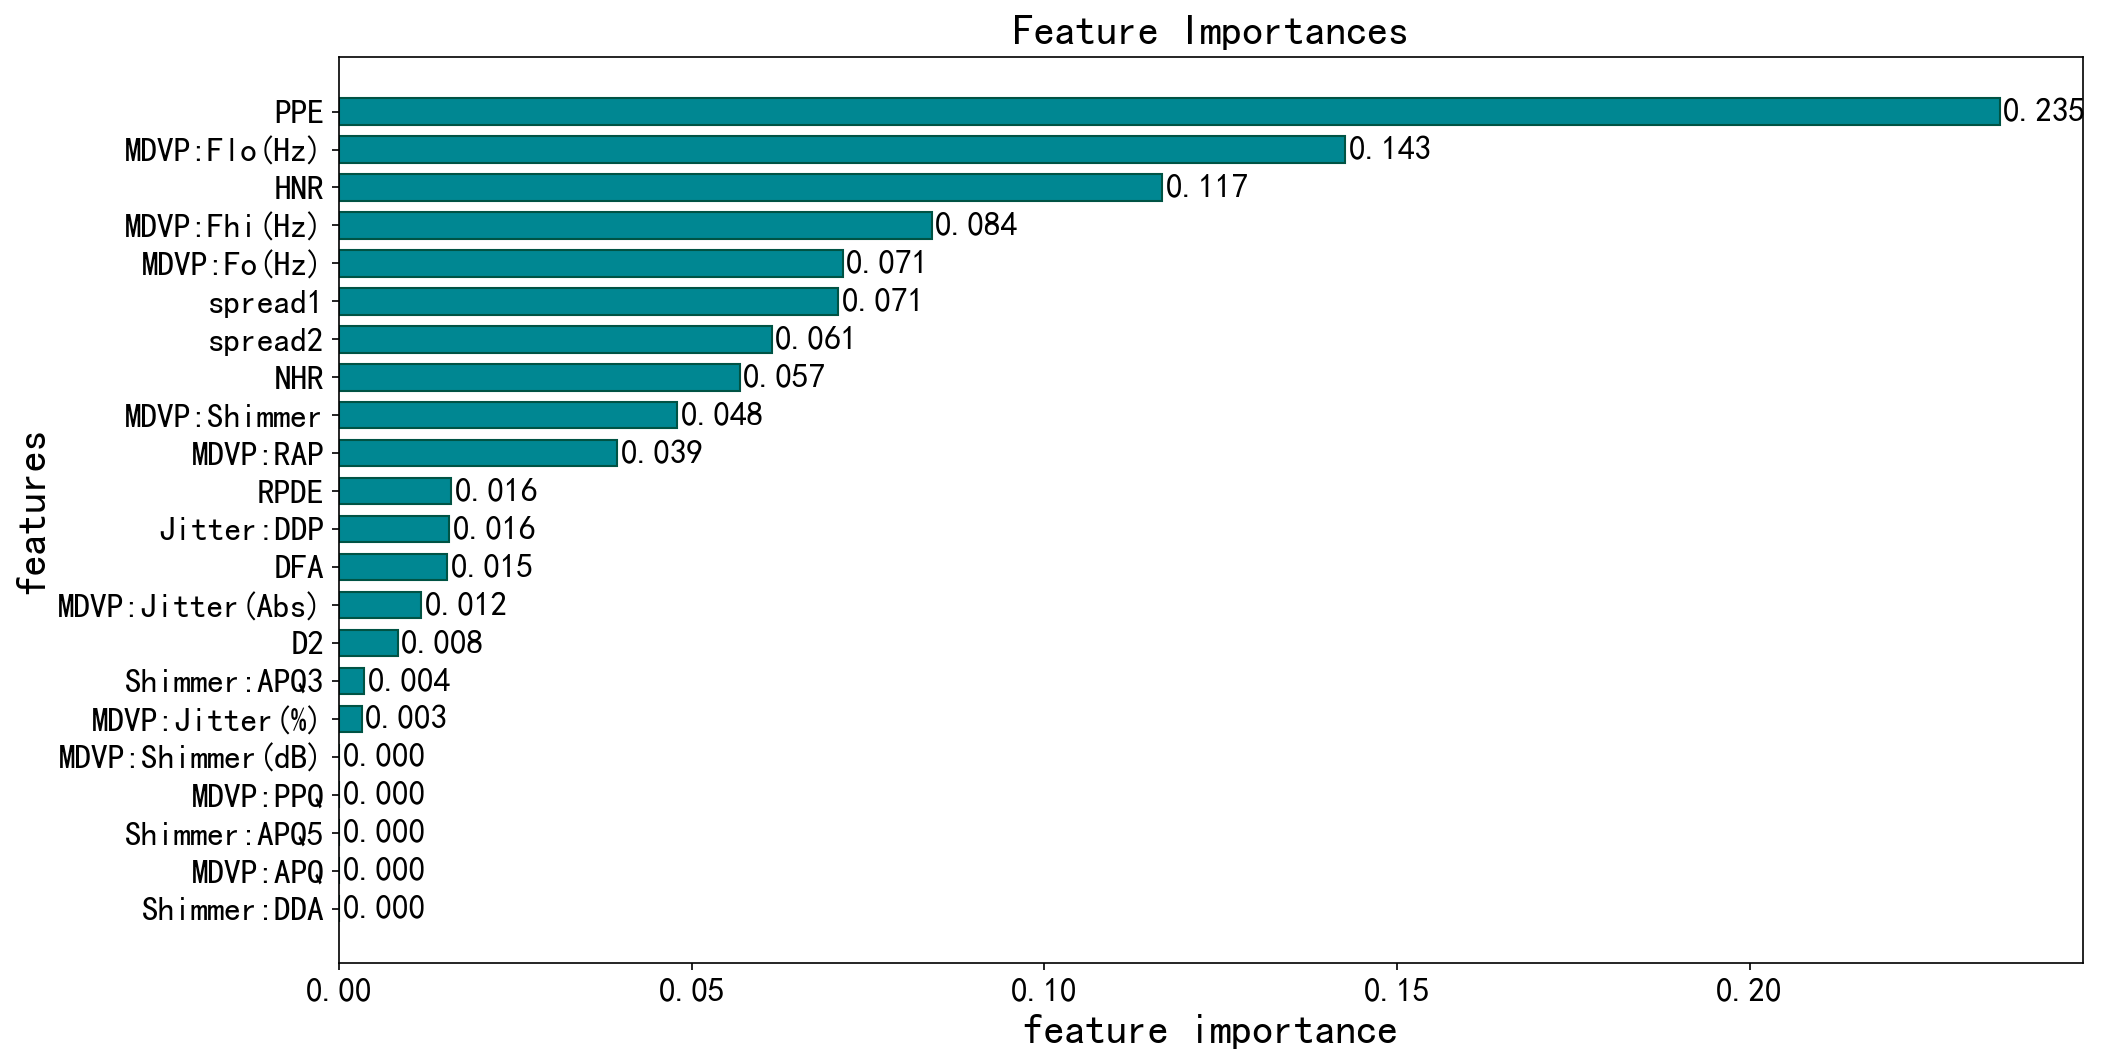

In [23]:
# 特征重要性评分可视化
plt.figure(figsize=(15,8))
plt.barh(features_import['feature'], features_import['importance'], height=0.7, 
         color='#008792', 
         edgecolor='#005344') # 更多颜色可参见颜色大全
plt.xlabel('feature importance',fontsize=20) # x 轴
plt.ylabel('features',fontsize=20) # y轴
plt.title('Feature Importances',fontsize=20) # 标题
for a,b in zip( features_import['importance'],features_import['feature']): #
    plt.text(a+0.0005, b,'%.3f'%float(a),verticalalignment='center') # 可以修改保留小数位数
plt.show()

In [24]:
# 降序
features_import1 = feature.sort_values(by='importance',ascending=False)
features_import1

,feature,importance
21,PPE,0.235467
2,MDVP:Flo(Hz),0.142623
15,HNR,0.116663
1,MDVP:Fhi(Hz),0.084017
0,MDVP:Fo(Hz),0.071413
18,spread1,0.070793
19,spread2,0.061349
14,NHR,0.056791
8,MDVP:Shimmer,0.047929
5,MDVP:RAP,0.039443


In [25]:
# 选择xgb算法的特征重要性评分前10的特征进行建模，阈值0.03
x_train = x_train.loc[:,data_after2.index[:10]]
x_test = x_test.loc[:,data_after2.index[:10]]

In [26]:
x_train.head()

,PPE,MDVP:Flo(Hz),HNR,MDVP:Fhi(Hz),MDVP:Fo(Hz),spread1,spread2,NHR,MDVP:Shimmer,MDVP:RAP
54,0.316700,102.874,21.028,134.656,108.807,-4.649573,0.205558,0.01036,0.02719,0.00349
63,0.093534,223.634,25.964,234.619,228.832,-7.245620,0.018689,0.00351,0.01644,0.00175
180,0.144105,144.736,23.133,163.441,150.440,-6.261446,0.183218,0.00611,0.02551,0.00206
50,0.103561,117.495,25.135,135.069,124.445,-6.650471,0.254498,0.00479,0.02184,0.00141
129,0.183572,105.667,26.369,126.632,120.078,-5.892061,0.195976,0.00487,0.01022,0.00116


In [27]:
x_test.head()

,PPE,MDVP:Flo(Hz),HNR,MDVP:Fhi(Hz),MDVP:Fo(Hz),spread1,spread2,NHR,MDVP:Shimmer,MDVP:RAP
193,0.123306,74.904,19.020,396.961,198.764,-6.744577,0.207454,0.07223,0.02296,0.00370
61,0.098555,98.664,26.138,238.987,223.365,-7.293801,0.086372,0.00301,0.01906,0.00154
4,0.410335,110.655,19.649,141.781,116.014,-3.747787,0.234513,0.01767,0.06425,0.00655
95,0.164916,149.605,21.693,163.267,157.447,-6.247076,0.180528,0.01018,0.03272,0.00201
59,0.316395,104.680,21.660,271.314,114.847,-4.609161,0.221711,0.01143,0.03225,0.00373


## 3 构建预测模型

In [28]:
# 定义评价指标
from sklearn.metrics import precision_score, recall_score, f1_score ,roc_curve, auc,confusion_matrix ,accuracy_score,roc_auc_score
def roc_curve_and_score(y_test, pred_proba):
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return roc_auc
def try_different_method(model):
    model.fit(x_train,y_train)
    yuce = model.predict(x_test) 
    print('测试集')
    precision = precision_score(y_test, yuce)
    recall = recall_score(y_test, yuce)
    f1score = f1_score(y_test, yuce)
    accuracy=accuracy_score(y_test, yuce)
    auc = roc_curve_and_score(y_test, model.predict_proba(x_test)[:, 1])
    print("AUC:", auc)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("f1_score：", f1score)

In [29]:
# 建立不同的模型
# 导入需要的包
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# 随机森林
model_RF = RandomForestClassifier(random_state=0,
                                 max_depth=6
                                 )

model_NB  = GaussianNB()
# 逻辑回归
model_LR = LogisticRegression(random_state=42)

# 输出测试集评价指标
print('随机森林模型评分如下：')
try_different_method(model_RF)
print('贝叶斯模型评分如下：')
try_different_method(model_NB)
print('逻辑回归模型评分如下：')
try_different_method(model_LR)

随机森林模型评分如下：
测试集
AUC: 0.9
Accuracy: 0.864406779661017
Precision: 0.9090909090909091
Recall: 0.9090909090909091
f1_score： 0.9090909090909091
贝叶斯模型评分如下：
测试集
AUC: 0.7681818181818182
Accuracy: 0.7288135593220338
Precision: 0.868421052631579
Recall: 0.75
f1_score： 0.8048780487804879
逻辑回归模型评分如下：
测试集
AUC: 0.8257575757575758
Accuracy: 0.847457627118644
Precision: 0.8723404255319149
Recall: 0.9318181818181818
f1_score： 0.9010989010989012


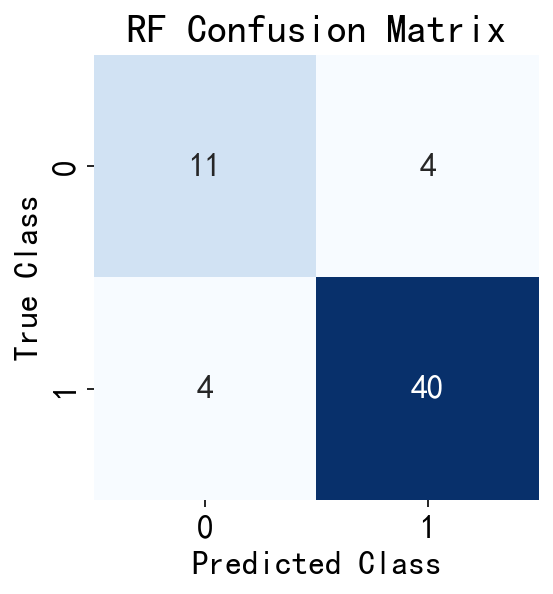

In [30]:
# RF混淆矩阵
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred1 = model_RF.predict(x_test)
matrix = confusion_matrix(y_test, y_pred1)
dataframe = pd.DataFrame(matrix, index=['0','1'], columns=['0','1'])
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='.5g',square=True)
plt.title("RF Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

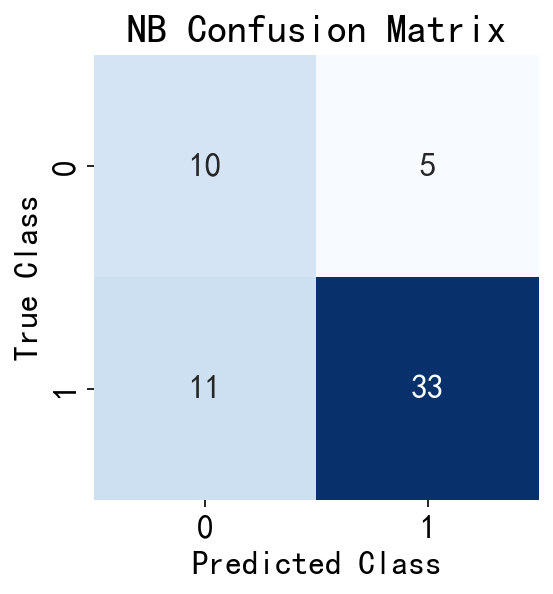

In [31]:
# NB混淆矩阵
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred2 = model_NB.predict(x_test)
matrix = confusion_matrix(y_test, y_pred2)
dataframe = pd.DataFrame(matrix, index=['0','1'], columns=['0','1'])
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='.5g',square=True)
plt.title("NB Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

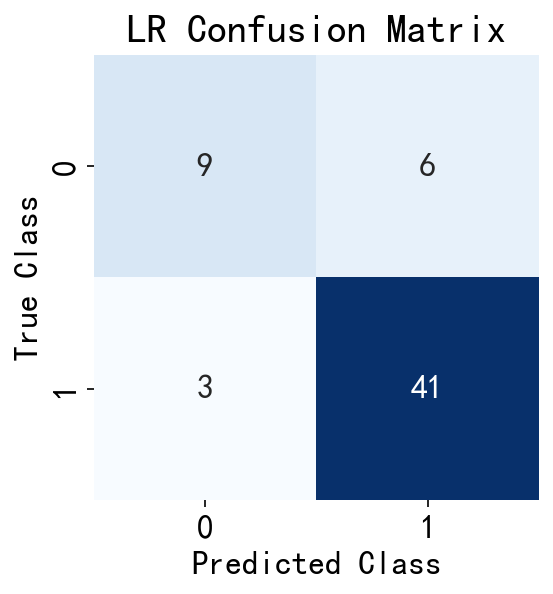

In [32]:
# LR混淆矩阵
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred3 = model_LR.predict(x_test)
matrix = confusion_matrix(y_test, y_pred3)
dataframe = pd.DataFrame(matrix, index=['0','1'], columns=['0','1'])
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='.5g',square=True)
plt.title("LR Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

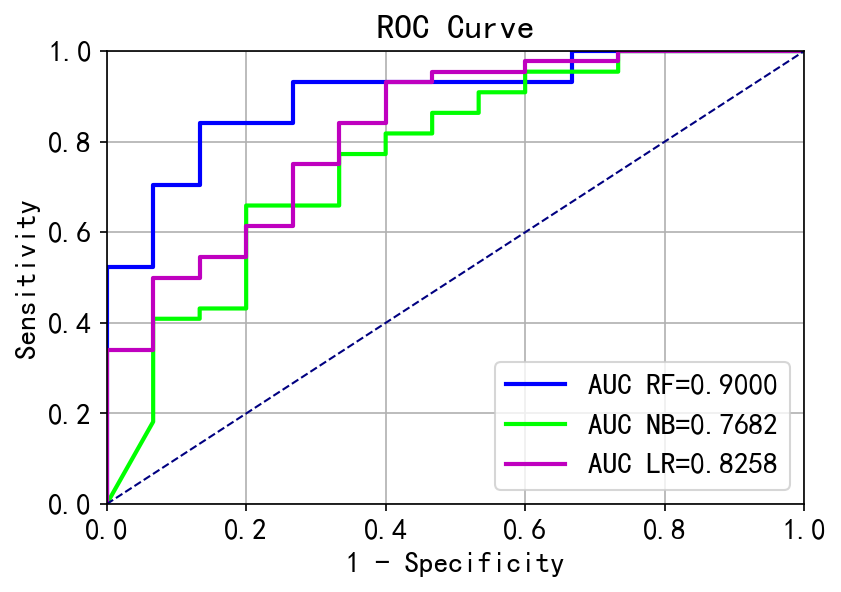

In [33]:
# 绘制ROC曲线
def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc
plt.figure()
plt.rcParams.update({'font.size': 14})
plt.grid()

fpr, tpr, roc_auc = roc_curve_and_score(y_test, model_RF.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, color='b', lw=2,
         label='AUC RF={0:.4f}'.format(roc_auc))

fpr, tpr, roc_auc = roc_curve_and_score(y_test, model_NB.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, color='lime', lw=2,
         label='AUC NB={0:.4f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, model_LR.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, color='m', lw=2,
         label='AUC LR={0:.4f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [34]:
                                                                                                                                                        
joblib.dump(model_NB, "NB.pkl")
joblib.dump(model_LR, "LR.pkl")

['LR.pkl']

In [35]:
x_test.head()

,PPE,MDVP:Flo(Hz),HNR,MDVP:Fhi(Hz),MDVP:Fo(Hz),spread1,spread2,NHR,MDVP:Shimmer,MDVP:RAP
193,0.123306,74.904,19.020,396.961,198.764,-6.744577,0.207454,0.07223,0.02296,0.00370
61,0.098555,98.664,26.138,238.987,223.365,-7.293801,0.086372,0.00301,0.01906,0.00154
4,0.410335,110.655,19.649,141.781,116.014,-3.747787,0.234513,0.01767,0.06425,0.00655
95,0.164916,149.605,21.693,163.267,157.447,-6.247076,0.180528,0.01018,0.03272,0.00201
59,0.316395,104.680,21.660,271.314,114.847,-4.609161,0.221711,0.01143,0.03225,0.00373


In [36]:
y_test

193    0
61     0
4      1
95     1
59     1
41     1
179    1
85     1
138    1
96     1
19     1
162    1
23     1
24     1
27     1
84     1
184    0
157    1
73     1
112    1
133    1
83     1
2      1
128    1
188    0
168    0
86     1
174    0
169    0
171    0
25     1
182    1
146    1
145    1
185    0
119    1
78     1
163    1
44     0
7      1
100    1
28     1
52     0
110    1
143    1
164    1
111    1
60     0
88     1
115    1
142    1
165    0
77     1
74     1
149    1
192    0
114    1
124    1
47     0
Name: status, dtype: int64